In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
output_path = os.path.abspath('../../plots/outputs')

## FBGT (Hyperparameter $p$ Tuning)

In [3]:
df = pd.DataFrame([['$\Psi_1$', 170, 320],
                   ['$\Psi_2$', 170, 210]],
                  columns=['Trials', '$f$ in $T^{[c]}_{filtered}$', '$p$ in $T^{[c]}$'])

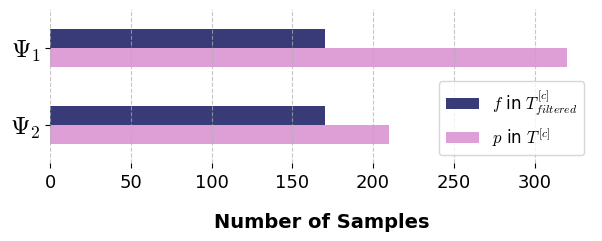

In [5]:
# run the cell two times 
df.plot(x='Trials',
        kind='barh',
        mark_right=True,
        cmap="tab20b",
        figsize=(7, 2),
        fontsize=18
       )

plt.rcParams['mathtext.fontset'] = 'cm'
plt.ylabel('')
plt.gca().invert_yaxis()
plt.xlabel('Number of Samples', fontsize=14, labelpad=15, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add a grid for the y-axis

# Remove the frame around the plot
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.legend(loc='lower right', fontsize=12)

# Adjust the font size of the x-axis ticks
plt.tick_params(axis='x', labelsize=13)

plt.savefig(f'{output_path}/fig-fagt-p-tuning.pdf', bbox_inches='tight')
plt.show()

## ISIC-2016 Dataset

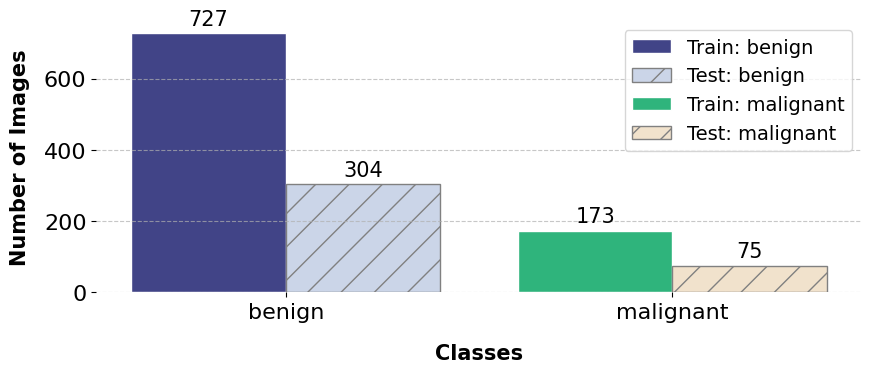

In [7]:
# run the cell two times 
def autolabel(rects, ax):
    """Attach a text label above each bar, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=15)

training_folder = os.path.abspath('../../datasets/ISIC-2016/split/train')
testing_folder = os.path.abspath('../../datasets/ISIC-2016/split/test')

categories = os.listdir(training_folder)
training_counts = []
testing_counts = []

for category in categories:
    training_path = os.path.join(training_folder, category)
    testing_path = os.path.join(testing_folder, category)

    if os.path.isdir(training_path):
        training_image_count = len(os.listdir(training_path))
        training_counts.append(training_image_count)

    if os.path.isdir(testing_path):
        testing_image_count = len(os.listdir(testing_path))
        testing_counts.append(testing_image_count)

# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(9, 4))

# Set the width of the bars and their positions
bar_width = 0.4
x_positions = np.arange(len(categories))

# Generate a sequence of evenly spaced values for the color gradient
color_range_1 = np.linspace(0.2, 0.65, len(categories))
color_range_2 = np.linspace(0.35, 0.8, len(categories))

# Choose the colormaps and apply the color values to generate the gradients
training_colors = plt.cm.viridis(color_range_1)
testing_colors = plt.cm.Pastel2(color_range_2)

# Create the bar plots
ax = plt.gca()

for i, category in enumerate(categories):
    training_bar = ax.bar(x_positions[i] - bar_width / 2, training_counts[i], color=training_colors[i], width=bar_width, label=f"Train: {category}", edgecolor='white')
    testing_bar = ax.bar(x_positions[i] + bar_width / 2, testing_counts[i], color=testing_colors[i], width=bar_width, label=f"Test: {category}", hatch='/', edgecolor='gray')

    # Add labels on top of the bars
    autolabel(training_bar, ax)
    autolabel(testing_bar, ax)

# Set the global font size
plt.rcParams.update({'font.size': 16})    
    
# Customize plot appearance
plt.xlabel("Classes", fontsize=15, labelpad=15, weight='bold')
plt.ylabel("Number of Images", fontsize=15, labelpad=10, weight='bold')
plt.xticks(x_positions, categories, rotation=0)  # Rotate category labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for the y-axis

# Create a custom legend to avoid duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=14)

# Remove the frame around the plot
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

# fig.savefig(f'{output_path}/fig-isic-2016-dataset.pdf', bbox_inches='tight')

## HAM10000 Dataset

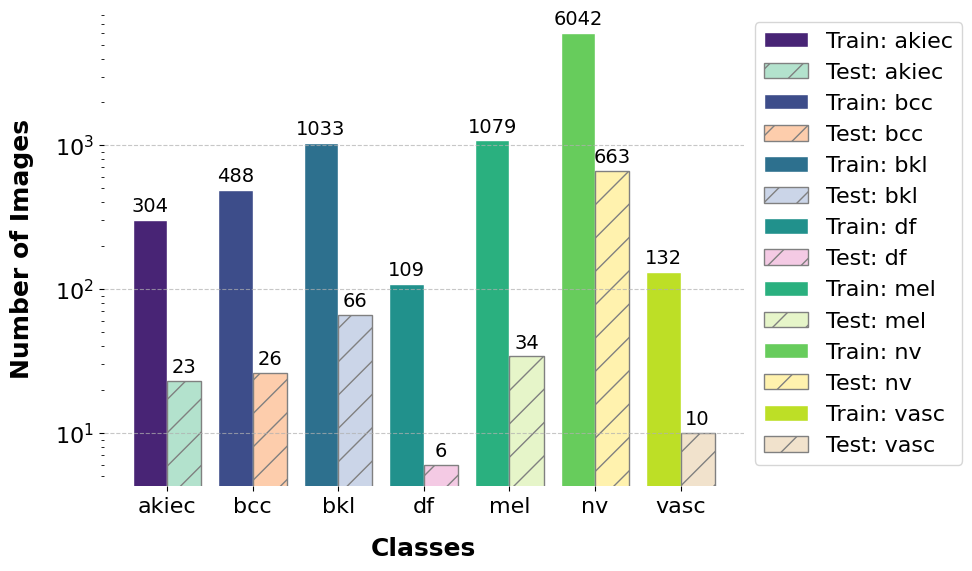

In [9]:
# run the cell two times 
def autolabel(rects, ax):
    """Attach a text label above each bar, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

training_folder = os.path.abspath('../../datasets/HAM10000/split/train')
testing_folder = os.path.abspath('../../datasets/HAM10000/split/test')

categories = os.listdir(training_folder)
training_counts = []
testing_counts = []

for category in categories:
    training_path = os.path.join(training_folder, category)
    testing_path = os.path.join(testing_folder, category)

    if os.path.isdir(training_path):
        training_image_count = len(os.listdir(training_path))
        training_counts.append(training_image_count)

    if os.path.isdir(testing_path):
        testing_image_count = len(os.listdir(testing_path))
        testing_counts.append(testing_image_count)

# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars and their positions
bar_width = 0.4
x_positions = np.arange(len(categories))

# Generate a sequence of evenly spaced values for the color gradient
color_range_1 = np.linspace(0.1, 0.9, len(categories))
color_range_2 = np.linspace(0.1, 0.8,len(categories))

# Choose the colormaps and apply the color values to generate the gradients
training_colors = plt.cm.viridis(color_range_1)
testing_colors = plt.cm.Pastel2(color_range_2)

# Create the bar plots
ax = plt.gca()

for i, category in enumerate(categories):
    training_bar = ax.bar(x_positions[i] - bar_width / 2, training_counts[i], color=training_colors[i], width=bar_width, label=f"Train: {category}", edgecolor='white')
    testing_bar = ax.bar(x_positions[i] + bar_width / 2, testing_counts[i], color=testing_colors[i], width=bar_width, label=f"Test: {category}", hatch='/', edgecolor='gray')

    # Add labels on top of the bars
    autolabel(training_bar, ax)
    autolabel(testing_bar, ax)

# Set the global font size
plt.rcParams.update({'font.size': 16})    
    
# Customize plot appearance
plt.xlabel("Classes", fontsize=18, labelpad=15, weight='bold')
plt.ylabel("Number of Images", fontsize=18, labelpad=15, weight='bold')
plt.yscale("log")
# plt.title("")
plt.xticks(x_positions, categories, rotation=0)  # Rotate category labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for the y-axis

# Create a custom legend to avoid duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left", bbox_to_anchor=(1, 1))

# Remove the frame around the plot
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Show the plot
plt.tight_layout()
plt.show()

# fig.savefig(f'{output_path}/fig-ham10000-dataset.pdf', bbox_inches='tight')

## ISIC-2016 (Real + Transformation + GAN)

In [10]:
real_dir = os.path.abspath('../../datasets/ISIC-2016/split/train')
oversample_dir = os.path.abspath('../../datasets/ISIC-2016/image-data-generator')

targetnames = ['benign', 'malignant']

for x in targetnames:    
    real = globals()['%s_real' % x] = len(os.listdir(real_dir + '/' + x))
    oversample = globals()['%s_oversample' % x] = len(os.listdir(oversample_dir + '/' + x))
    globals()['%s_generated' % x] = oversample - real
        
for x in targetnames:
    globals()['%s_GAN' % x] = 2000 - globals()['%s_oversample' % x]

# Define the DataFrame
df = pd.DataFrame([['benign', benign_real, benign_generated, benign_GAN],
                   ['malignant', malignant_real, malignant_generated, malignant_GAN]],
                  columns=['Class', 'Real', 'Transformation', 'StyleGAN2-ADA'])

In [11]:
df

,Class,Real,Transformation,StyleGAN2-ADA
0,benign,727,192,1081
1,malignant,173,679,1148


In [12]:
matrix = df[['Real', 'Transformation', 'StyleGAN2-ADA']].values.tolist()
classes = df['Class'].values.tolist()

In [13]:
matrix

[[727, 192, 1081], [173, 679, 1148]]

In [14]:
classes

['benign', 'malignant']

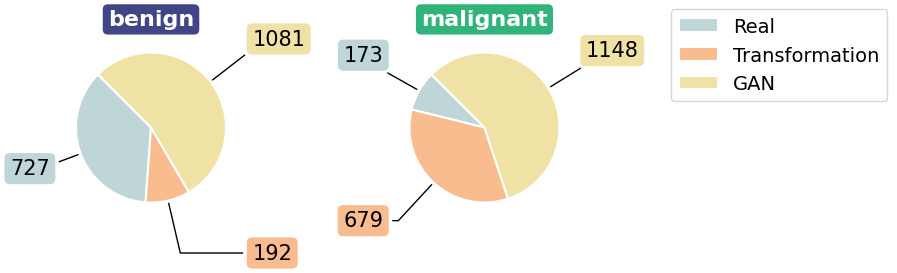

In [15]:
# Create a list of 7 sets of 3 pie chart data
pie_data = matrix

# Create a list of colors for the pie charts
colors = ['#BFD6D9', '#F9BC8F', '#F0E2A4']

# Create a list of labels for the pie charts
labels = classes

# Create 7 subplots with 2 rows
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))

# Flatten the array of axes for easier indexing
ax = ax.flatten()

# Choose the colormaps and apply the color values to generate the gradients
color_codes = plt.cm.viridis(np.linspace(0.2, 0.65, 2))

# Loop through each subplot and create a 3 pie chart
for i in range(2):
    wedges, _, _ = ax[i].pie(pie_data[i], colors=colors, startangle=135, autopct='', pctdistance=0.1, labeldistance=1.05, wedgeprops={'edgecolor': 'w', 'linewidth': 1.5})
    ax[i].set_title(f'{labels[i].lower()}', color='white', fontweight='bold', fontsize=16, bbox={'facecolor': color_codes[i], 'edgecolor': color_codes[i], 'pad': 0.2, 'boxstyle': 'round'})
    
    # Add a white circle to create a donut plot
    # centre_circle = plt.Circle((0,0), 0.50, fc='white')
    # ax[i].add_artist(centre_circle)
    
    # Add values to the pie charts and lines connecting them
    recipe = [f"{pie_data[i][j]}" for j in range(3)]
    
    for j, w in enumerate(wedges):
        ang = (w.theta2 - w.theta1)/2. + w.theta1
        x, y = w.center
        x = x + 1 * np.cos(np.deg2rad(ang))
        y = y + 1 * np.sin(np.deg2rad(ang))
        
        kw = dict(arrowprops=dict(arrowstyle="-"), 
                  bbox=dict(boxstyle="round, pad=0.3", edgecolor="white", facecolor=colors[j]))
        
        if recipe[j] != '0':
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = f"angle,angleA=0,angleB={ang}"
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax[i].annotate(recipe[j], xy=(x, y), xytext=(1.35*np.sign(x), 1.8*y),
                        horizontalalignment=horizontalalignment, **kw, fontsize=15)
    
# Adjust the spacing between subplots
fig.tight_layout(pad=1.5)

# Hide the last subplot for the 8th label
# ax[-1].set_visible(False)

# top
fig.legend(['Real', 'Transformation', 'GAN'], 
           fontsize=14, 
           loc='lower center', 
           ncol=1, 
           bbox_to_anchor=(1.15, 0.57))

# Display the plot
plt.show()

# save figure
# fig.savefig(f'{output_path}/fig-isic-2016-augmented.pdf', bbox_inches='tight')

## HAM10000 (Real + Transformation + GAN)

In [16]:
real_dir = os.path.abspath('../../datasets/HAM10000/split/train')
oversample_dir = os.path.abspath('../../datasets/HAM10000/image-data-generator')

targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

for x in targetnames:    
    real = globals()['%s_real' % x] = len(os.listdir(real_dir + '/' + x))
    if x != 'nv':
        oversample = globals()['%s_oversample' % x] = len(os.listdir(oversample_dir + '/' + x))
        globals()['%s_generated' % x] = oversample - real
        
for x in targetnames:
    if x != 'nv':
        globals()['%s_GAN' % x] = nv_real - globals()['%s_oversample' % x]
        
df = pd.DataFrame([['akiec', akiec_real, akiec_generated, akiec_GAN],
                   ['bcc', bcc_real, bcc_generated, bcc_GAN],
                   ['bkl', bkl_real, bkl_generated, bkl_GAN],
                   ['df', df_real, df_generated, df_GAN],
                   ['mel', mel_real, mel_generated, mel_GAN],
                   ['nv', nv_real, 0, 0],
                   ['vasc', vasc_real, vasc_generated, vasc_GAN]],
                  columns=['Class', 'Real', 'Transformation', 'StyleGAN2-ADA'])

In [17]:
df

,Class,Real,Transformation,StyleGAN2-ADA
0,akiec,304,1520,4218
1,bcc,488,1528,4026
2,bkl,1033,2578,2431
3,df,109,532,5401
4,mel,1079,2606,2357
5,nv,6042,0,0
6,vasc,132,524,5386


In [18]:
matrix = df[['Real', 'Transformation', 'StyleGAN2-ADA']].values.tolist()
classes = df['Class'].values.tolist()

In [19]:
matrix

[[304, 1520, 4218],
 [488, 1528, 4026],
 [1033, 2578, 2431],
 [109, 532, 5401],
 [1079, 2606, 2357],
 [6042, 0, 0],
 [132, 524, 5386]]

In [20]:
classes

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

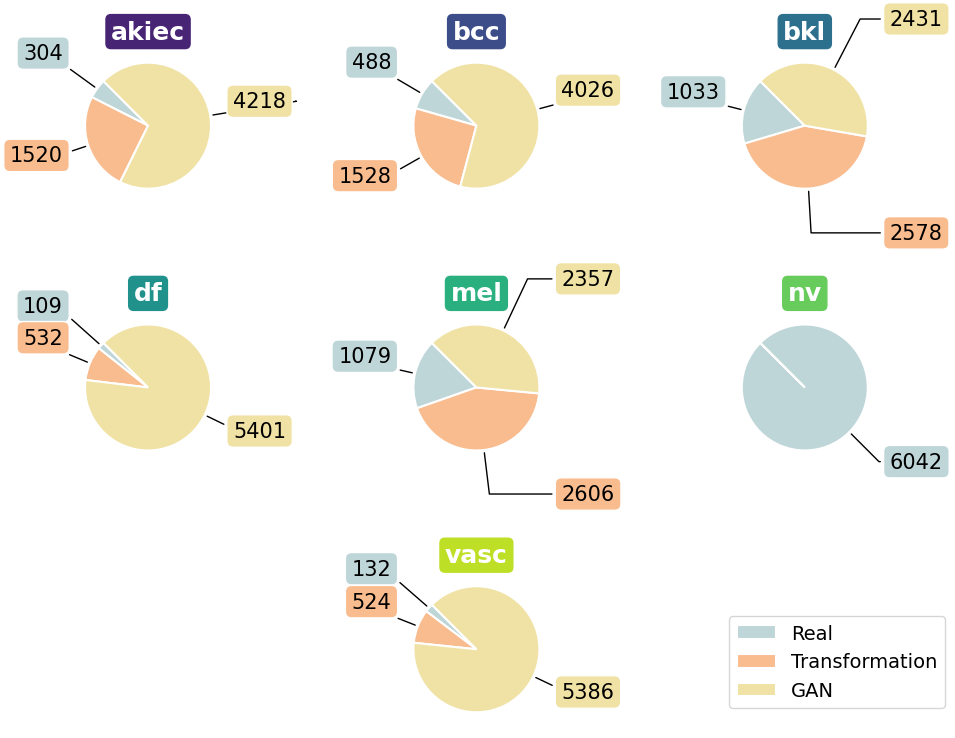

In [21]:
# Create a list of 7 sets of 3 pie chart data
pie_data = matrix

# Create a list of colors for the pie charts
colors = ['#BFD6D9', '#F9BC8F', '#F0E2A4']

# Create a list of labels for the pie charts
labels = classes

# Create 7 subplots with 2 rows
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(14, 8))

# Flatten the array of axes for easier indexing
ax = ax.flatten()

# Indices of subplots where confusion matrices should be placed
cm_indices = [0, 1, 2, 3, 4, 5, 7]

# Choose the colormaps and apply the color values to generate the gradients
color_codes = plt.cm.viridis(np.linspace(0.1, 0.9, 7))

# Loop through each subplot and create a 3 pie chart
for i, cm_idx in enumerate(cm_indices):
    wedges, _, _ = ax[cm_idx].pie(
        pie_data[i], colors=colors, 
        startangle=135, 
        autopct='', 
        pctdistance=0.1, 
        labeldistance=1.05, 
        wedgeprops={'edgecolor': 'w', 'linewidth': 1.5})
    ax[cm_idx].set_title(
        f'{labels[i].lower()}', 
        color='white', 
        fontweight='bold', 
        fontsize=18, 
        bbox={'facecolor': color_codes[i], 'edgecolor': color_codes[i], 'pad': 0.2, 'boxstyle': 'round'})
    
    # Add values to the pie charts and lines connecting them
    recipe = [f"{pie_data[i][j]}" for j in range(3)]
    
    for j, w in enumerate(wedges):
        ang = (w.theta2 - w.theta1)/2. + w.theta1
        x, y = w.center
        x = x + 1 * np.cos(np.deg2rad(ang))
        y = y + 1 * np.sin(np.deg2rad(ang))
        
        kw = dict(arrowprops=dict(arrowstyle="-"), 
                  bbox=dict(boxstyle="round, pad=0.3", edgecolor="white", facecolor=colors[j]))
        
        if recipe[j] != '0':
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = f"angle,angleA=0,angleB={ang}"
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax[cm_idx].annotate(recipe[j], xy=(x, y), xytext=(1.35*np.sign(x), 1.8*y),
                        horizontalalignment=horizontalalignment, **kw, fontsize=15)
    
# Adjust the spacing between subplots
fig.tight_layout(w_pad=-15, h_pad=1.5)

# Hide the last subplot for the 8th label
ax[-1].set_visible(False)
ax[-3].set_visible(False)

fig.legend(['Real', 'Transformation', 'GAN'], 
           fontsize=14, 
           loc='lower center', 
           ncol=1, 
           bbox_to_anchor=(0.77, 0.08))

# Display the plot
plt.show()

# save figure
# fig.savefig(f'{output_path}/fig-ham10000-augmented.pdf', bbox_inches='tight')

## UMAP

In [22]:
import sys
sys.path.append('../')

from plot_umap import UMAP

In [23]:
umap = UMAP()

### ISIC-2016 (No-Filtering)

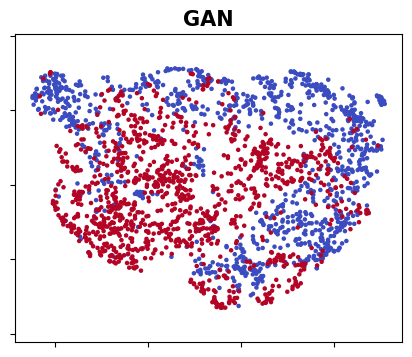

In [24]:
umap.plot_2d(
    folder_path=os.path.abspath('../../datasets/ISIC-2016/stylegan2-ada/oversampling/No-Filtering/oversample'), 
    title='GAN',
    legend=False,
    save_fig=True,
    save_dir=os.path.join(output_path, 'umap'),
    save_name='fig-isic-2016-umap-no-fl'
)

### ISIC-2016 (FBGT+α1=0.80)

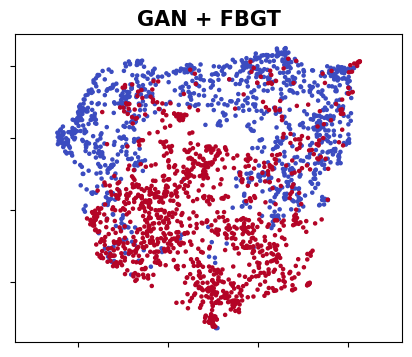

In [25]:
umap.plot_2d(
    folder_path=os.path.abspath('../../datasets/ISIC-2016/stylegan2-ada/oversampling/FBGT/alpha_1/oversample'), 
    title='GAN + FBGT',
    legend=False,
    save_fig=True,
    save_dir=os.path.join(output_path, 'umap'),
    save_name='fig-isic-2016-umap-fbgt-alpha-1'
)

### ISIC-2016 (FAGT+α1=0.75)

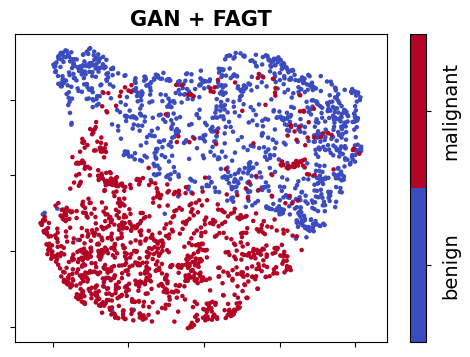

In [26]:
umap.plot_2d(
    folder_path=os.path.abspath('../../datasets/ISIC-2016/stylegan2-ada/oversampling/FAGT/alpha_1/filtered'), 
    title='GAN + FAGT',
    legend=True,
    width=6,
    save_fig=True,
    save_dir=os.path.join(output_path, 'umap'),
    save_name='fig-isic-2016-umap-fagt-alpha-1'
)

### HAM10000(No-Filtering)

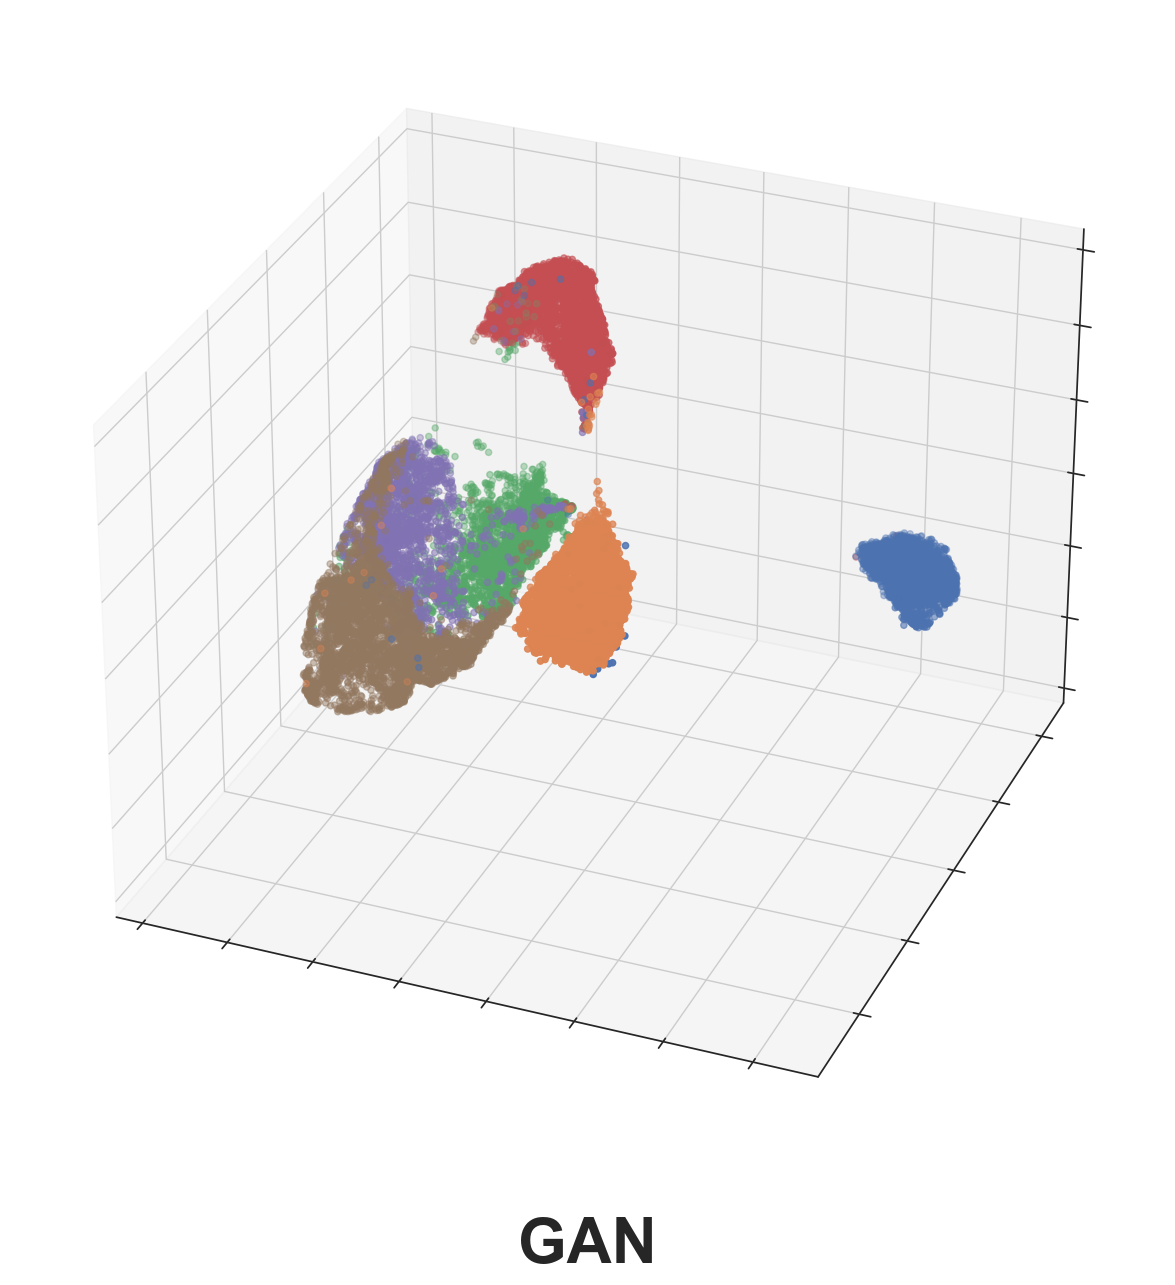

In [27]:
umap.plot_3d(
    folder_path=os.path.abspath('../../datasets/HAM10000/stylegan2-ada/oversampling/No-Filtering/oversample'),
    title='GAN',
    save_fig=True,
    save_dir=os.path.join(output_path, 'umap'),
    save_name='fig-ham10000-umap-no-fl',
    legend=False,
    angle_2=112
)

### HAM10000(FBGT+α1=0.80)

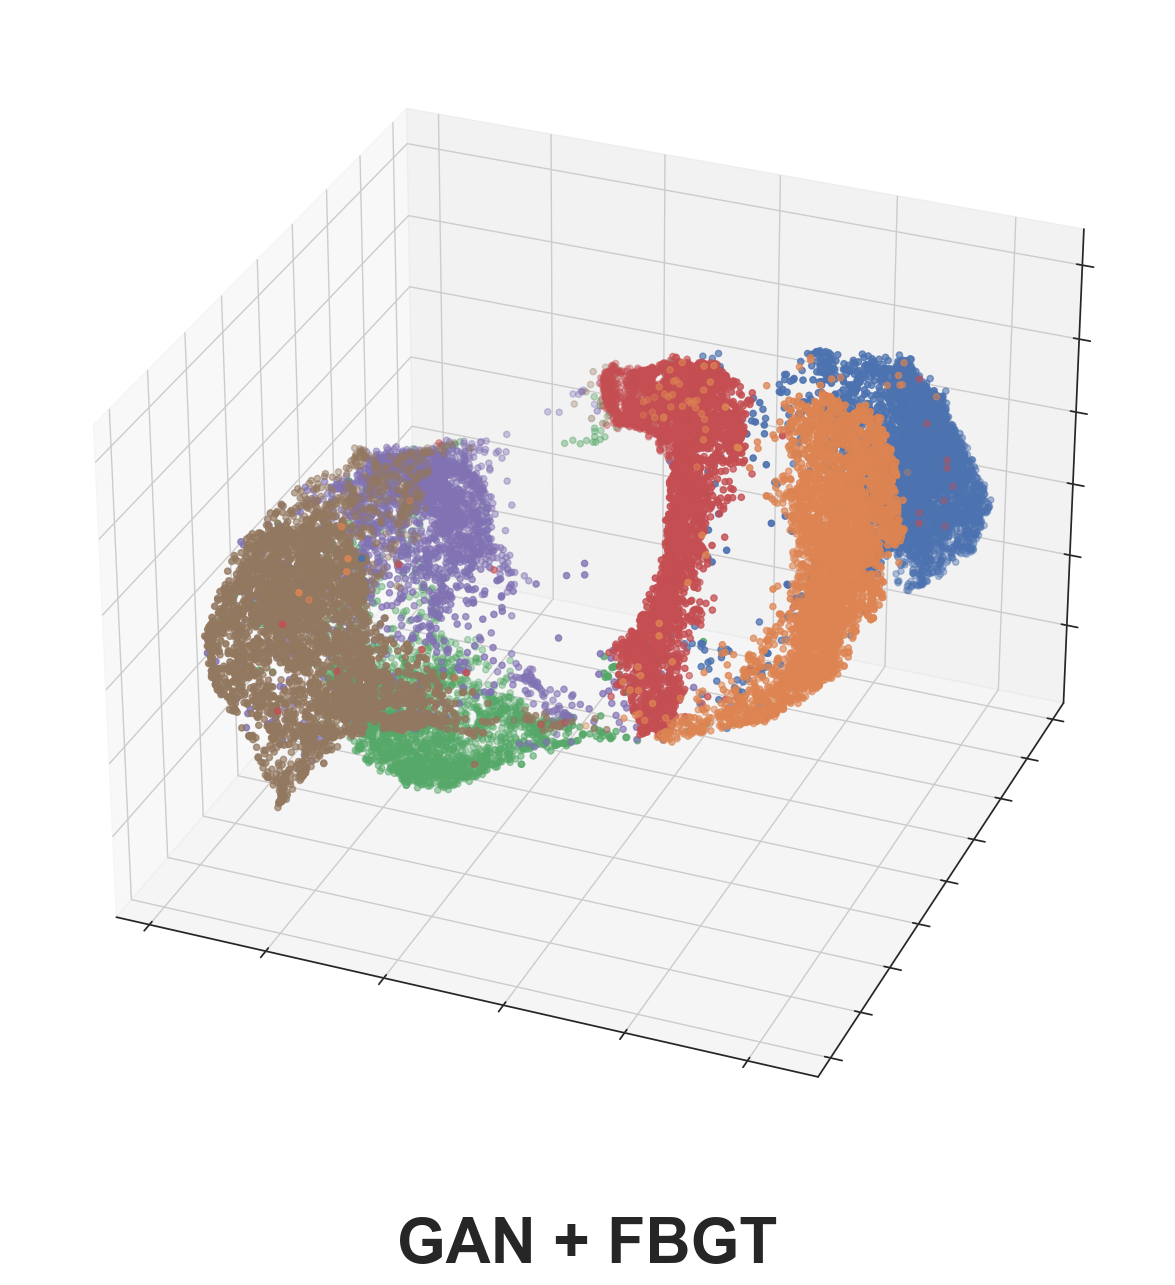

In [28]:
umap.plot_3d(
    folder_path= os.path.abspath('../../datasets/HAM10000/stylegan2-ada/oversampling/FBGT/alpha_1/oversample'),
    title='GAN + FBGT',
    save_fig=True,
    save_dir=os.path.join(output_path, 'umap'),
    save_name='fig-ham10000-umap-fbgt-alpha-1',
    legend=False,
    angle_2=112
)

### HAM10000(FAGT+α3=0.85)

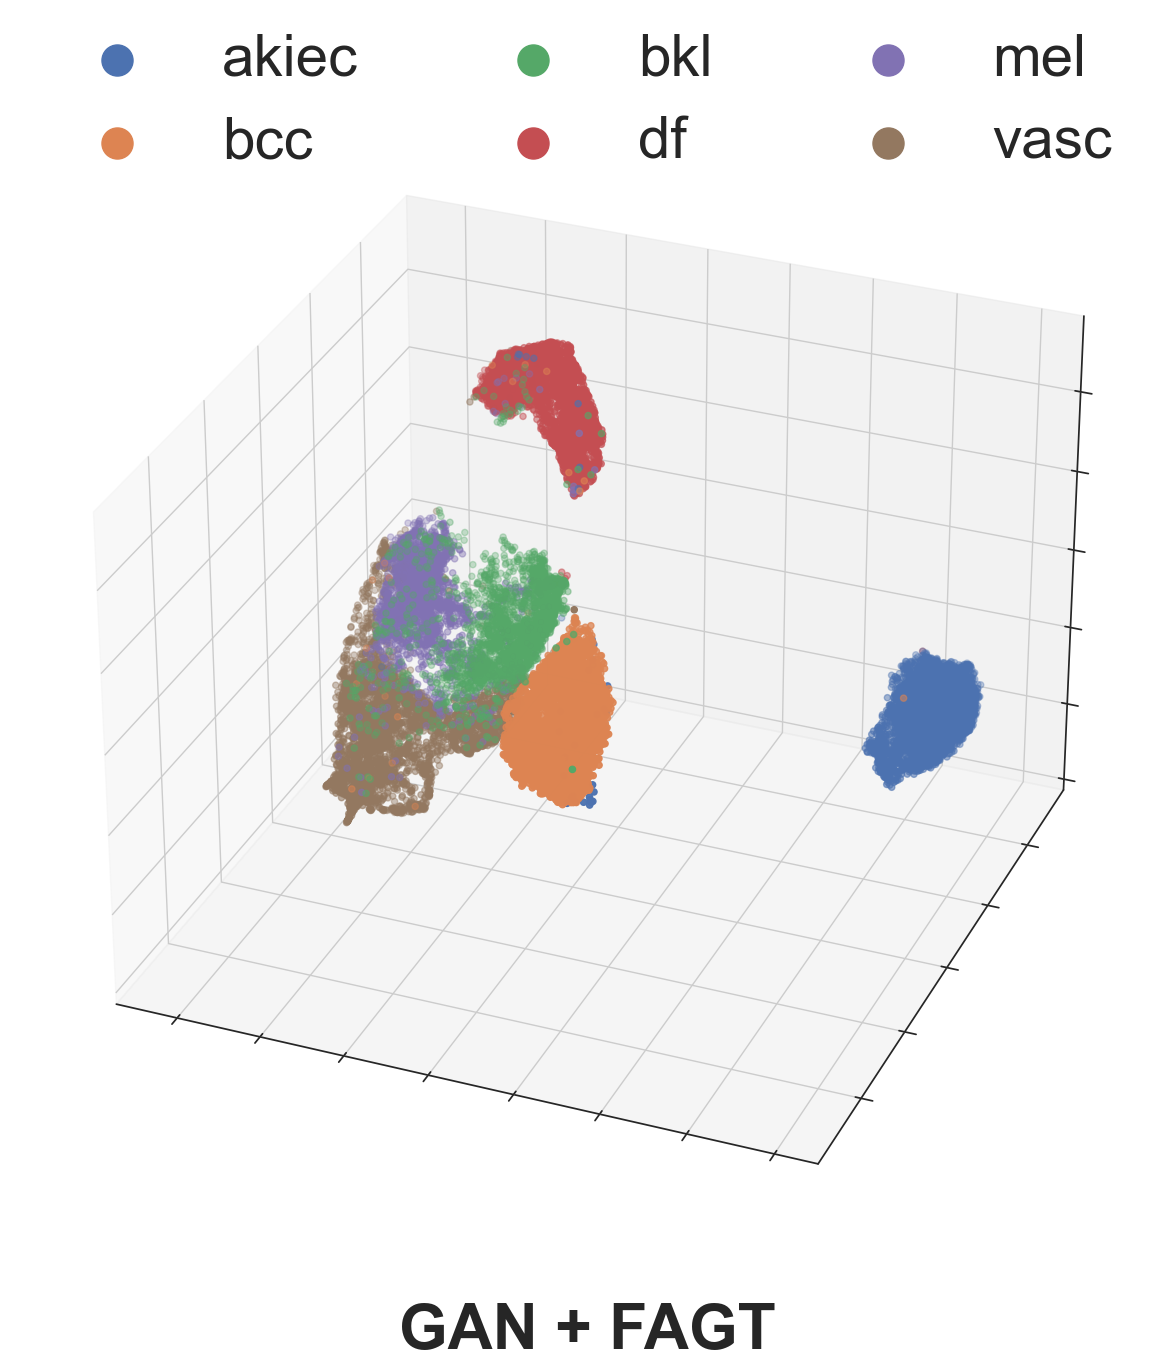

In [29]:
umap.plot_3d(
    folder_path= os.path.abspath('../../datasets/HAM10000/stylegan2-ada/oversampling/FAGT/alpha_3/filtered'),
    title='GAN + FAGT',
    save_fig=True,
    save_dir=os.path.join(output_path, 'umap'),
    save_name='fig-ham10000-umap-fagt-alpha-3',
    legend=True,
    angle_2=112
)